In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('scaler.csv')
data.shape

(400, 5)

In [3]:
data.head()

User_ID  Gender  No_of_Days  No_of_Calls  Enrolled
0  15624510    Male           0         0.30         0
1  15810944    Male          15         0.37         0
2  15668575  Female           6         2.07         0
3  15603246  Female           7         3.11         0
4  15804002    Male           0         4.52         0

<AxesSubplot:xlabel='No_of_Calls', ylabel='No_of_Days'>

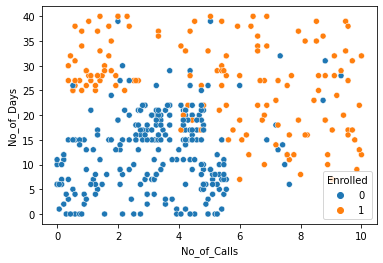

In [6]:
sns.scatterplot(data= data, x= 'No_of_Calls',y = 'No_of_Days' , hue = 'Enrolled')

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['No_of_Calls', 'No_of_Days']], 
                                                    data['Enrolled'], test_size=0.33, random_state=42)

In [11]:
X_train.shape, X_test.shape

((268, 2), (132, 2))

In [14]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [16]:
X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

In [22]:
# convert to numpy
X_train = X_train.values
X_test = X_test.values

In [34]:
y_train = y_train.values
y_test = y_test.values

In [51]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2)).round(3)

def kNNPredict(X_train, y_train, x_query, k = 5):

    n  = X_train.shape[0]
    distances = []
    
    for i in range(n):
        d = distance(x_query, X_train[i])
        distances.append((d, y_train[i]))
        
    distances = sorted(distances)
    distances = distances[:k]
    
    votes = [x[1] for x in distances]

    uniq, counts = np.unique(votes, return_counts=True)

    pred = uniq[np.argmax(counts)]
    
        
    return pred

In [54]:
kNNPredict(X_train, y_train, X_test[25])

1

In [55]:
y_test[25]

1

In [89]:
y_pred = []

for query in X_test:
    p = kNNPredict(X_train, y_train, query, k = 19)
    y_pred.append(p)
    
y_pred = np.array(y_pred)

In [90]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [91]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [92]:
acc = (y_pred == y_test).sum() / len(y_test)
print(acc.round(5)*100)

93.939


## Hyper-parameter tuning

In [95]:
def give_me_accuracy(k):
    y_pred = []

    for query in X_test:
        p = kNNPredict(X_train, y_train, query, k = k)
        y_pred.append(p)

    y_pred = np.array(y_pred)
    
    acc = (y_pred == y_test).sum() / len(y_test)
    return acc.round(5)*100

In [96]:
scores = []
k_values = []


for k in range(1, 50):
    k_values.append(k)
    score = give_me_accuracy(k)
    scores.append(score)

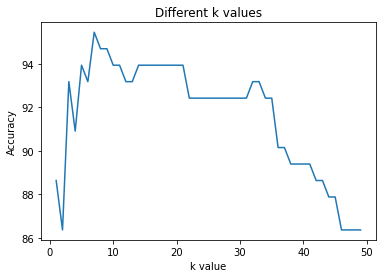

In [103]:
plt.plot(k_values, scores)
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [104]:
np.argmax(scores)

6

# BEST k = 7